In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import boston_housing
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
# データ作成&正規化

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

def make_normalized_data(data, axis=0):
    mean_data = data.mean(axis)
    std_data = data.std(axis)
    normalized_data = (data - mean_data) / std_data
    return normalized_data

train_data = make_normalized_data(X_train)
train_label = make_normalized_data(y_train)
pre_test_data = make_normalized_data(X_train)
pre_test_label = make_normalized_data(y_train)
test_data, val_data, test_label, val_label = train_test_split(pre_test_data, pre_test_label, test_size=0.2)

print("正規化&データ分割")
print("train_data.shape", train_data.shape)
print("train_label.shape", train_label.shape)
print("test_data.shape", test_data.shape)
print("test_label.shape", test_label.shape)
print("val_data.shape", val_data.shape)
print("val_label.shape", val_label.shape)

正規化&データ分割
train_data.shape (404, 13)
train_label.shape (404,)
test_data.shape (323, 13)
test_label.shape (323,)
val_data.shape (81, 13)
val_label.shape (81,)


In [3]:
# Model

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [4]:
# Model Fitting

epochs = 500
batch_size = 30
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1)

history = model.fit(
    train_data, train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(test_data, test_label),
    callbacks=[early_stopping]
)

Train on 404 samples, validate on 323 samples
Epoch 1/500
404/404 [==============================] - 0s 410us/step - loss: 0.9331 - mae: 0.6714 - val_loss: 0.5932 - val_mae: 0.4954
Epoch 2/500
404/404 [==============================] - 0s 102us/step - loss: 0.5231 - mae: 0.4615 - val_loss: 0.3606 - val_mae: 0.4031
Epoch 3/500
404/404 [==============================] - 0s 130us/step - loss: 0.3212 - mae: 0.3744 - val_loss: 0.2486 - val_mae: 0.3357
Epoch 4/500
404/404 [==============================] - 0s 113us/step - loss: 0.2335 - mae: 0.3265 - val_loss: 0.1914 - val_mae: 0.3116
Epoch 5/500
404/404 [==============================] - 0s 104us/step - loss: 0.1887 - mae: 0.2980 - val_loss: 0.1556 - val_mae: 0.2795
Epoch 6/500
404/404 [==============================] - 0s 97us/step - loss: 0.1615 - mae: 0.2796 - val_loss: 0.1312 - val_mae: 0.2559
Epoch 7/500
404/404 [==============================] - 0s 109us/step - loss: 0.1431 - mae: 0.2592 - val_loss: 0.1215 - val_mae: 0.2517
Epoch 8/50

404/404 [==============================] - 0s 115us/step - loss: 0.0360 - mae: 0.1356 - val_loss: 0.0314 - val_mae: 0.1259
Epoch 61/500
404/404 [==============================] - 0s 73us/step - loss: 0.0340 - mae: 0.1299 - val_loss: 0.0306 - val_mae: 0.1225
Epoch 62/500
404/404 [==============================] - 0s 93us/step - loss: 0.0341 - mae: 0.1290 - val_loss: 0.0305 - val_mae: 0.1223
Epoch 63/500
404/404 [==============================] - 0s 84us/step - loss: 0.0345 - mae: 0.1310 - val_loss: 0.0302 - val_mae: 0.1235
Epoch 64/500
404/404 [==============================] - 0s 98us/step - loss: 0.0353 - mae: 0.1332 - val_loss: 0.0304 - val_mae: 0.1236
Epoch 65/500
404/404 [==============================] - 0s 119us/step - loss: 0.0329 - mae: 0.1307 - val_loss: 0.0300 - val_mae: 0.1229
Epoch 66/500
404/404 [==============================] - 0s 76us/step - loss: 0.0329 - mae: 0.1285 - val_loss: 0.0289 - val_mae: 0.1191
Epoch 67/500
404/404 [==============================] - 0s 100us/s

404/404 [==============================] - 0s 102us/step - loss: 0.0168 - mae: 0.0928 - val_loss: 0.0163 - val_mae: 0.0891
Epoch 121/500
404/404 [==============================] - 0s 117us/step - loss: 0.0171 - mae: 0.0941 - val_loss: 0.0162 - val_mae: 0.0910
Epoch 122/500
404/404 [==============================] - 0s 86us/step - loss: 0.0163 - mae: 0.0922 - val_loss: 0.0158 - val_mae: 0.0907
Epoch 123/500
404/404 [==============================] - 0s 100us/step - loss: 0.0159 - mae: 0.0916 - val_loss: 0.0153 - val_mae: 0.0885
Epoch 124/500
404/404 [==============================] - 0s 88us/step - loss: 0.0166 - mae: 0.0923 - val_loss: 0.0158 - val_mae: 0.0908
Epoch 125/500
404/404 [==============================] - 0s 114us/step - loss: 0.0160 - mae: 0.0897 - val_loss: 0.0154 - val_mae: 0.0880
Epoch 126/500
404/404 [==============================] - 0s 71us/step - loss: 0.0164 - mae: 0.0943 - val_loss: 0.0146 - val_mae: 0.0864
Epoch 127/500
404/404 [==============================] - 0

404/404 [==============================] - 0s 108us/step - loss: 0.0106 - mae: 0.0718 - val_loss: 0.0099 - val_mae: 0.0699
Epoch 181/500
404/404 [==============================] - 0s 88us/step - loss: 0.0095 - mae: 0.0680 - val_loss: 0.0092 - val_mae: 0.0661
Epoch 182/500
404/404 [==============================] - 0s 87us/step - loss: 0.0096 - mae: 0.0685 - val_loss: 0.0107 - val_mae: 0.0736
Epoch 183/500
404/404 [==============================] - 0s 83us/step - loss: 0.0109 - mae: 0.0743 - val_loss: 0.0089 - val_mae: 0.0660
Epoch 184/500
404/404 [==============================] - 0s 110us/step - loss: 0.0094 - mae: 0.0679 - val_loss: 0.0110 - val_mae: 0.0774
Epoch 185/500
404/404 [==============================] - 0s 104us/step - loss: 0.0105 - mae: 0.0738 - val_loss: 0.0102 - val_mae: 0.0717
Epoch 186/500
404/404 [==============================] - 0s 86us/step - loss: 0.0103 - mae: 0.0734 - val_loss: 0.0107 - val_mae: 0.0707
Epoch 187/500
404/404 [==============================] - 0s

404/404 [==============================] - 0s 87us/step - loss: 0.0085 - mae: 0.0663 - val_loss: 0.0079 - val_mae: 0.0653
Epoch 241/500
404/404 [==============================] - 0s 111us/step - loss: 0.0080 - mae: 0.0625 - val_loss: 0.0070 - val_mae: 0.0575
Epoch 242/500
404/404 [==============================] - 0s 78us/step - loss: 0.0080 - mae: 0.0639 - val_loss: 0.0092 - val_mae: 0.0720
Epoch 243/500
404/404 [==============================] - 0s 100us/step - loss: 0.0080 - mae: 0.0644 - val_loss: 0.0074 - val_mae: 0.0616
Epoch 244/500
404/404 [==============================] - 0s 85us/step - loss: 0.0086 - mae: 0.0685 - val_loss: 0.0069 - val_mae: 0.0588
Epoch 245/500
404/404 [==============================] - 0s 88us/step - loss: 0.0077 - mae: 0.0642 - val_loss: 0.0076 - val_mae: 0.0609
Epoch 246/500
404/404 [==============================] - 0s 115us/step - loss: 0.0087 - mae: 0.0693 - val_loss: 0.0080 - val_mae: 0.0659
Epoch 247/500
404/404 [==============================] - 0s

404/404 [==============================] - 0s 87us/step - loss: 0.0069 - mae: 0.0618 - val_loss: 0.0065 - val_mae: 0.0578
Epoch 301/500
404/404 [==============================] - 0s 104us/step - loss: 0.0060 - mae: 0.0554 - val_loss: 0.0049 - val_mae: 0.0467
Epoch 302/500
404/404 [==============================] - 0s 103us/step - loss: 0.0051 - mae: 0.0469 - val_loss: 0.0044 - val_mae: 0.0453
Epoch 303/500
404/404 [==============================] - 0s 70us/step - loss: 0.0049 - mae: 0.0471 - val_loss: 0.0050 - val_mae: 0.0493
Epoch 304/500
404/404 [==============================] - 0s 87us/step - loss: 0.0052 - mae: 0.0514 - val_loss: 0.0041 - val_mae: 0.0420
Epoch 305/500
404/404 [==============================] - 0s 87us/step - loss: 0.0054 - mae: 0.0507 - val_loss: 0.0070 - val_mae: 0.0658
Epoch 306/500
404/404 [==============================] - 0s 88us/step - loss: 0.0064 - mae: 0.0574 - val_loss: 0.0047 - val_mae: 0.0478
Epoch 307/500
404/404 [==============================] - 0s 

Epoch 360/500
404/404 [==============================] - 0s 91us/step - loss: 0.0058 - mae: 0.0552 - val_loss: 0.0053 - val_mae: 0.0500
Epoch 361/500
404/404 [==============================] - 0s 102us/step - loss: 0.0053 - mae: 0.0532 - val_loss: 0.0056 - val_mae: 0.0572
Epoch 362/500
404/404 [==============================] - 0s 106us/step - loss: 0.0054 - mae: 0.0507 - val_loss: 0.0048 - val_mae: 0.0490
Epoch 363/500
404/404 [==============================] - 0s 92us/step - loss: 0.0056 - mae: 0.0543 - val_loss: 0.0038 - val_mae: 0.0427
Epoch 364/500
404/404 [==============================] - 0s 109us/step - loss: 0.0042 - mae: 0.0449 - val_loss: 0.0037 - val_mae: 0.0425
Epoch 365/500
404/404 [==============================] - 0s 84us/step - loss: 0.0037 - mae: 0.0420 - val_loss: 0.0043 - val_mae: 0.0478
Epoch 366/500
404/404 [==============================] - 0s 85us/step - loss: 0.0038 - mae: 0.0415 - val_loss: 0.0034 - val_mae: 0.0386
Epoch 367/500
404/404 [======================

404/404 [==============================] - 0s 91us/step - loss: 0.0038 - mae: 0.0421 - val_loss: 0.0030 - val_mae: 0.0370
Epoch 421/500
404/404 [==============================] - 0s 103us/step - loss: 0.0032 - mae: 0.0383 - val_loss: 0.0030 - val_mae: 0.0366
Epoch 422/500
404/404 [==============================] - 0s 113us/step - loss: 0.0035 - mae: 0.0414 - val_loss: 0.0041 - val_mae: 0.0487
Epoch 423/500
404/404 [==============================] - 0s 84us/step - loss: 0.0038 - mae: 0.0411 - val_loss: 0.0033 - val_mae: 0.0411
Epoch 424/500
404/404 [==============================] - 0s 89us/step - loss: 0.0031 - mae: 0.0384 - val_loss: 0.0031 - val_mae: 0.0383
Epoch 425/500
404/404 [==============================] - 0s 86us/step - loss: 0.0028 - mae: 0.0349 - val_loss: 0.0032 - val_mae: 0.0392
Epoch 426/500
404/404 [==============================] - 0s 93us/step - loss: 0.0031 - mae: 0.0365 - val_loss: 0.0024 - val_mae: 0.0321
Epoch 427/500
404/404 [==============================] - 0s 

In [5]:
# Logs

mae_ = history.history["mae"]
val_mae_ = val_acc = history.history['val_mae']
loss_ = loss = history.history['loss']
val_loss_ = val_loss = history.history['val_loss']

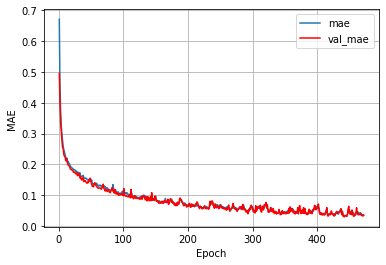

In [6]:
# MAE Graph

plt.plot(range(1, len(mae_) + 1), mae_, label="mae")
plt.plot(range(1, len(val_mae_) + 1), val_mae_, color = "red", label="val_mae")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

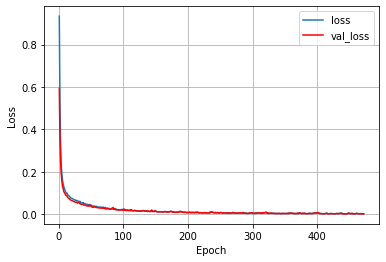

In [7]:
# Loss Graph

plt.plot(range(1, len(loss_) + 1), loss_, label="loss")
plt.plot(range(1, len(val_loss_) + 1), val_loss_, color = "red", label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Validation

predictions = model.predict(val_data)
    
for i, (l, p) in enumerate(zip(val_label, predictions)):
    msg = str(i) + ", label: " + str(round(l, 3)) + ", prediction: " + str(round(p[0], 3))
    print(msg)

0, label: 0.077, prediction: 0.1
1, label: -0.402, prediction: -0.41
2, label: 2.501, prediction: 2.521
3, label: 3.001, prediction: 3.029
4, label: 0.022, prediction: 0.062
5, label: 0.435, prediction: 0.45
6, label: 2.164, prediction: 2.185
7, label: 1.327, prediction: 1.301
8, label: 0.011, prediction: 0.015
9, label: 0.077, prediction: 0.13
10, label: -0.989, prediction: -0.988
11, label: -0.684, prediction: -0.674
12, label: -0.326, prediction: -0.261
13, label: -0.13, prediction: -0.129
14, label: -0.684, prediction: -0.612
15, label: 0.088, prediction: 0.109
16, label: 0.055, prediction: 0.052
17, label: -0.5, prediction: -0.547
18, label: -0.206, prediction: -0.212
19, label: -0.847, prediction: -0.944
20, label: 3.001, prediction: 3.035
21, label: -1.0, prediction: -1.011
22, label: -1.065, prediction: -0.932
23, label: 2.327, prediction: 2.35
24, label: -0.021, prediction: -0.017
25, label: 0.044, prediction: 0.049
26, label: -0.782, prediction: -0.785
27, label: 0.077, predi